# Flying Mantines

ModSim Project 3

Lydia Hodges and Chase Joyner

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)

In [1]:
%matplotlib notebook

from modsim import *

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
degree = UNITS.degree
radian = UNITS.radian

In [17]:
condition = Condition(x = 0 * m, 
                      y = 0 * m,
                      g = 9.8 * m/s**2,
                      mass = 1350 * kg,
                      diameter = 6 * m,
                      rho = 1.2 * kg/m**3,
                      den = 1000 * kg/m**3,
                      C_l = 2 * np.pi * angle,
                      C_d = 1.28 * np.sin(angle),
                      wing_area = 14.14 * m**2,
                      m_den = 950 * kg/m**2,
                      angle = 60 * degree,
                      velocity = 6.7 * m / s,
                      duration = 5.1 * s)

In [18]:
def make_system(condition):
    
    unpack(condition)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    # compute timestamps
    ts = linspace(0, duration, 101)
    
    return System(init=init, g=g, mass=mass, 
                  area=area, rho=rho, C_d=C_d, ts=ts)

In [19]:
system = make_system(condition)

In [20]:
def slope_func(state, t, system):
    
    x, y, vx, vy = state
    unpack(system)
    
    a_grav = Vector(0, -g)

    v = Vector(vx, vy)
    
    f_drag = -C_d * wing_area * rho * (velocity**2 / 2)
    a_drag = f_drag / mass
    
    f_lift = C_l * wing_area * rho * (velocity**2 / 2)
    a_lift = f_lift / mass
    
    a = a_grav + a_drag
    
    return vx, vy, a.x, a.y

In [21]:
slope_func(init, 0, system)

(<Quantity(3.350000000000001, 'meter / second')>,
 <Quantity(5.802370205355738, 'meter / second')>,
 <Quantity(-0.3127210373774177, 'meter / second ** 2')>,
 <Quantity(-10.112721037377419, 'meter / second ** 2')>)

In [22]:
run_odeint(system, slope_func)

<IPython.core.display.Javascript object>


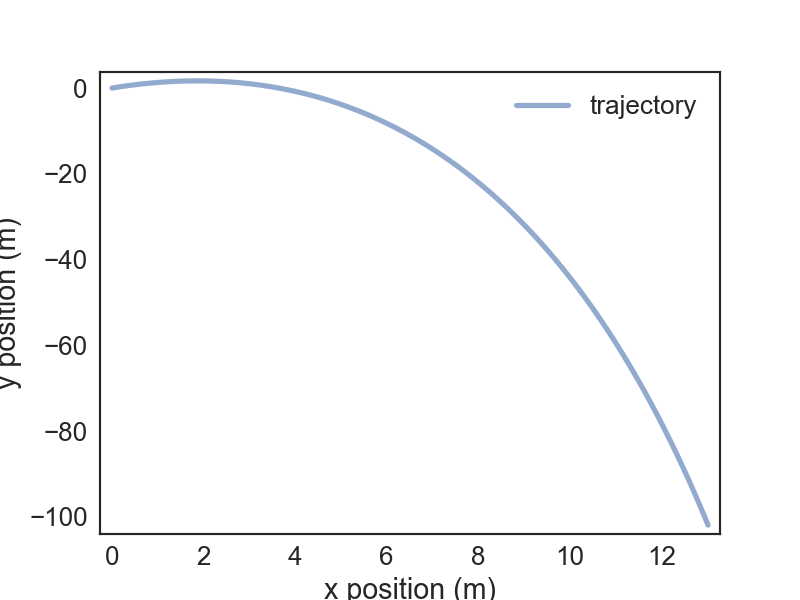

In [23]:
xs = system.results.x
ys = system.results.y
newfig()
plot(xs, ys, label='trajectory')
decorate(xlabel='x position (m)',
         ylabel='y position (m)')